In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999

In [2]:
def load_original_data():
    return pd.read_csv("data/Data_Marketing_Customer_Analysis_Round2.csv" )

In [3]:
customers_df.vehicle_class.value_counts()

NameError: name 'customers_df' is not defined

In [4]:
def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    df=df.drop(columns=['unnamed:_0', 'vehicle_type',"customer","number_of_open_complaints"])
    df=df.dropna()
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    df["month"]=list(map(lambda date:date.strftime(format="%B"),df["effective_to_date"]))
    return df

In [5]:
def transform(df):
    df=df[df['income']>0]
    df["total_claim_amount"]=round(df["total_claim_amount"],0)
    df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0)
    df.vehicle_class[customers_df.vehicle_class.isin(["Luxury Car","Luxury SUV"])] = "Luxury Car"
    df.vehicle_class[customers_df.vehicle_class.isin(["Four-Door Car","SUV"])] = "Four-Door Car"
    df.policy[df.policy.isin(["Personal L3","Personal L2","Personal L1"]) ] = "Personal"
    df.policy[df.policy.isin(["Corporate L3","Corporate L2","Corporate L1"]) ] = "Corporate"
    df.policy[df.policy.isin(["Special L3","Special L2","Special L1"]) ] = "Special"
    df=df.drop(columns=["month","education"])
    df.number_of_policies[df.number_of_policies>2]=3
    return df

In [6]:
customers_df=load_original_data()
customers_df=clean_data(customers_df)
customers_df=transform(customers_df)

<ipython-input-5-d81fbe62968f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_claim_amount"]=round(df["total_claim_amount"],0)
<ipython-input-5-d81fbe62968f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0)
<ipython-input-5-d81fbe62968f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [7]:
customers_df.shape

(6817, 21)

In [8]:
customers_df.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

# Plotting

EDA Catgorical Columns 

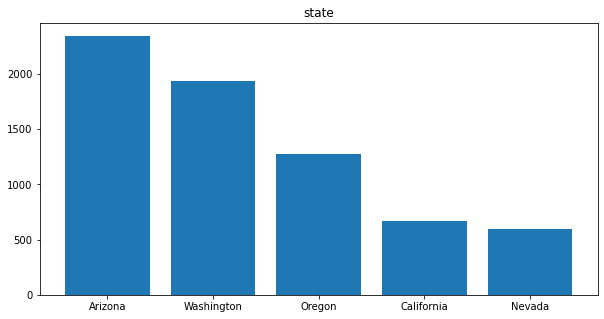

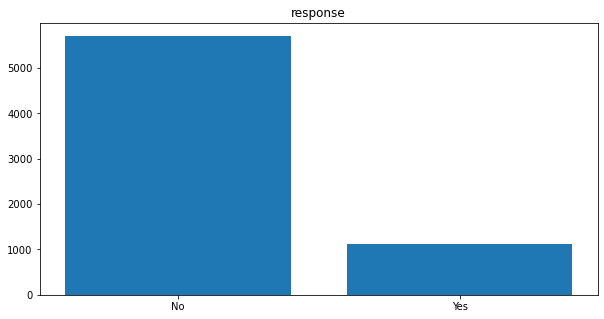

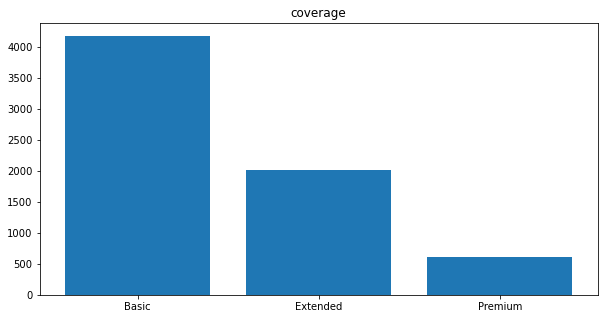

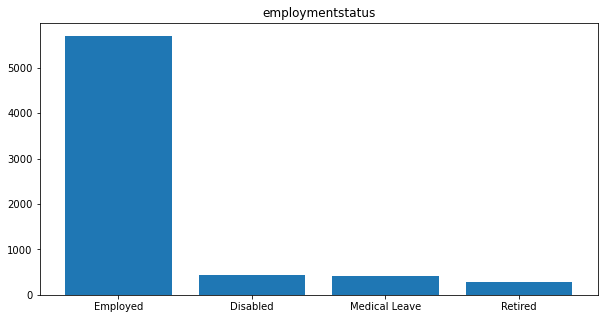

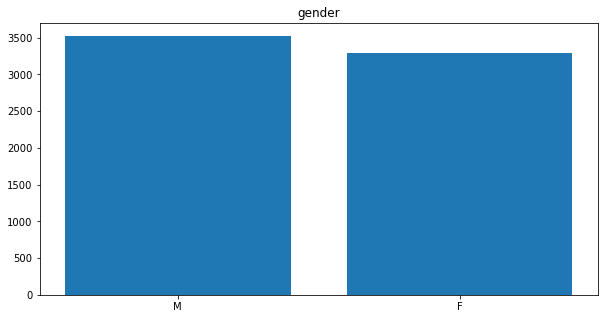

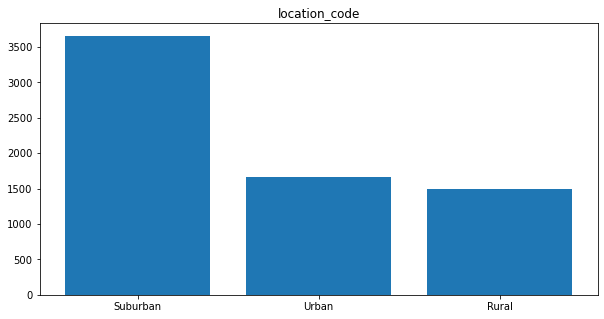

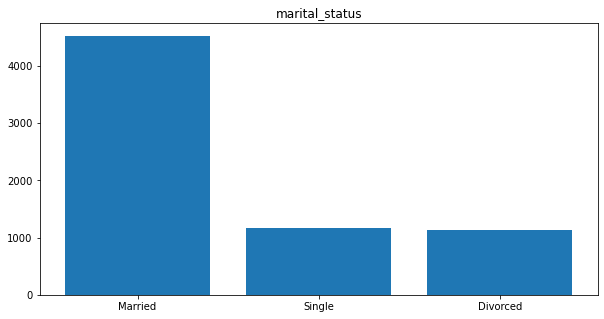

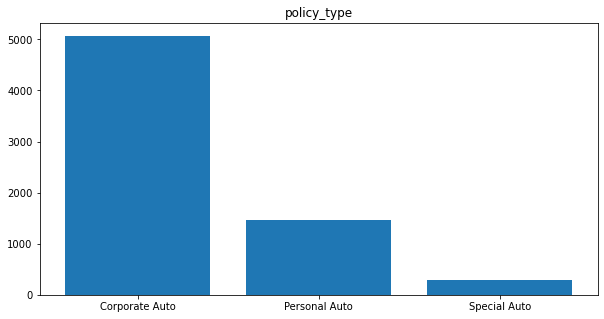

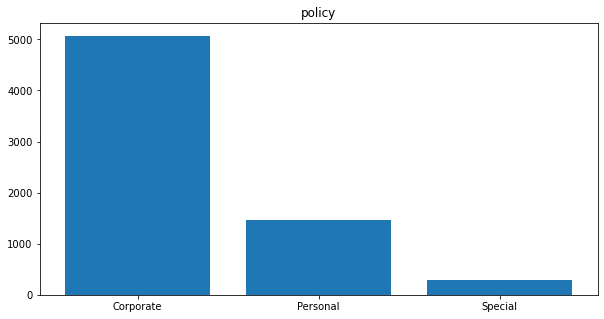

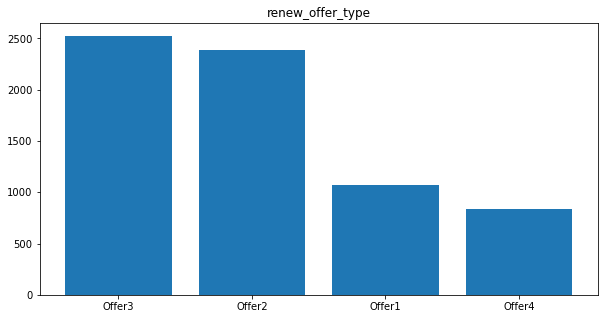

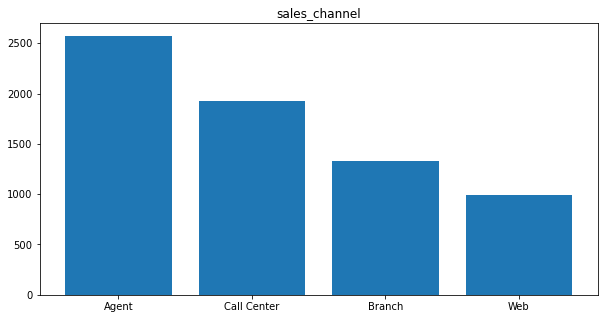

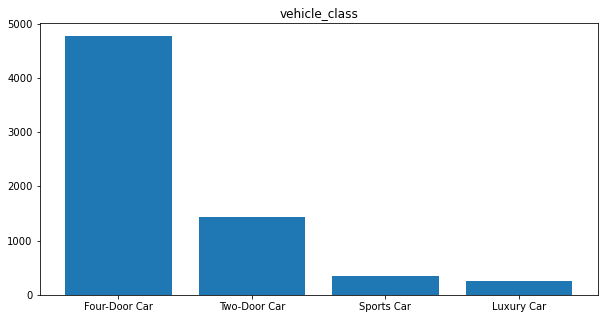

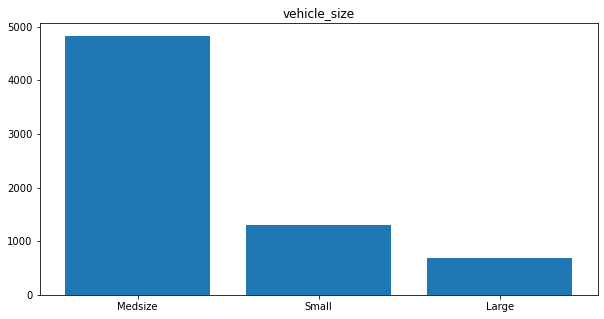

In [9]:
for c in customers_df.select_dtypes(object):
    plt.figure(figsize=(10,5))
    plt.bar(customers_df[c].unique(), customers_df[c].value_counts())
    plt.title(c)
    plt.show();

### Show a plot of the total number of responses.

<AxesSubplot:>

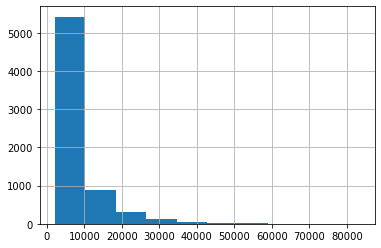

In [10]:
customers_df.customer_lifetime_value.hist()

/home/flo/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


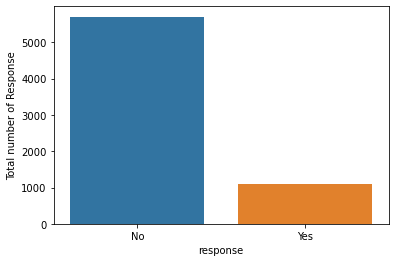

In [11]:
sns.countplot('response', data=customers_df)
plt.ylabel('Total number of Response')
plt.show()

### Show a plot of the response rate by the sales channel.

/home/flo/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


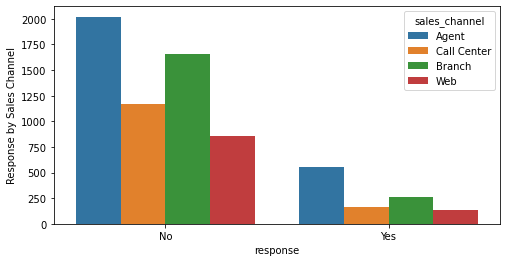

In [12]:
plt.figure(figsize=(8,4))
sns.countplot('response', hue='sales_channel', data=customers_df)
plt.ylabel('Response by Sales Channel')
plt.show()


### Show a plot of the response rate by the total claim amount.


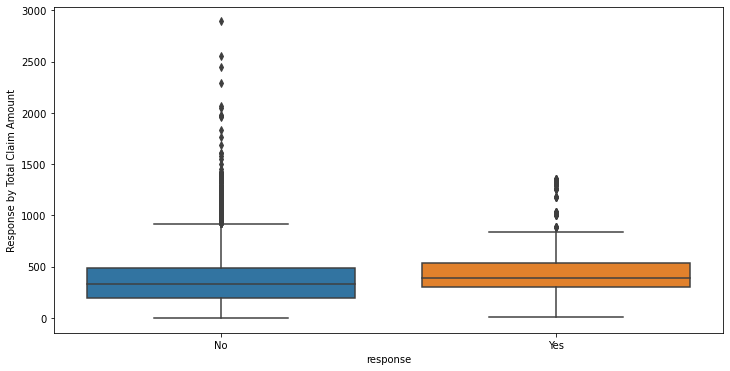

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(y='total_claim_amount' , x='response', data=customers_df)
plt.ylabel('Response by Total Claim Amount')
plt.show()


### Show a plot of the response rate by income.


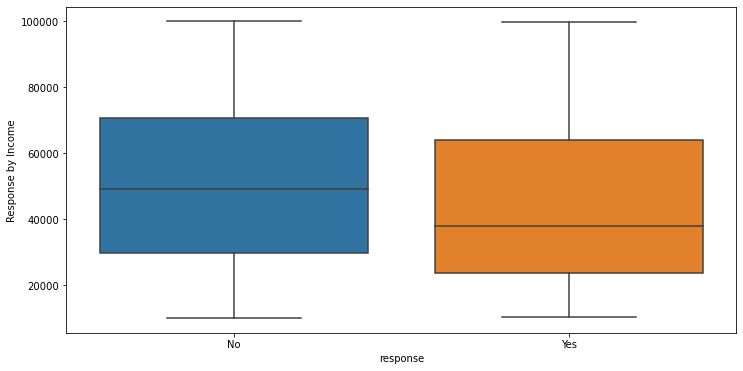

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(y='income' , x='response', data=customers_df)
plt.ylabel('Response by Income')
plt.show()

# Data Transformation Lab

#### Check normality visually.

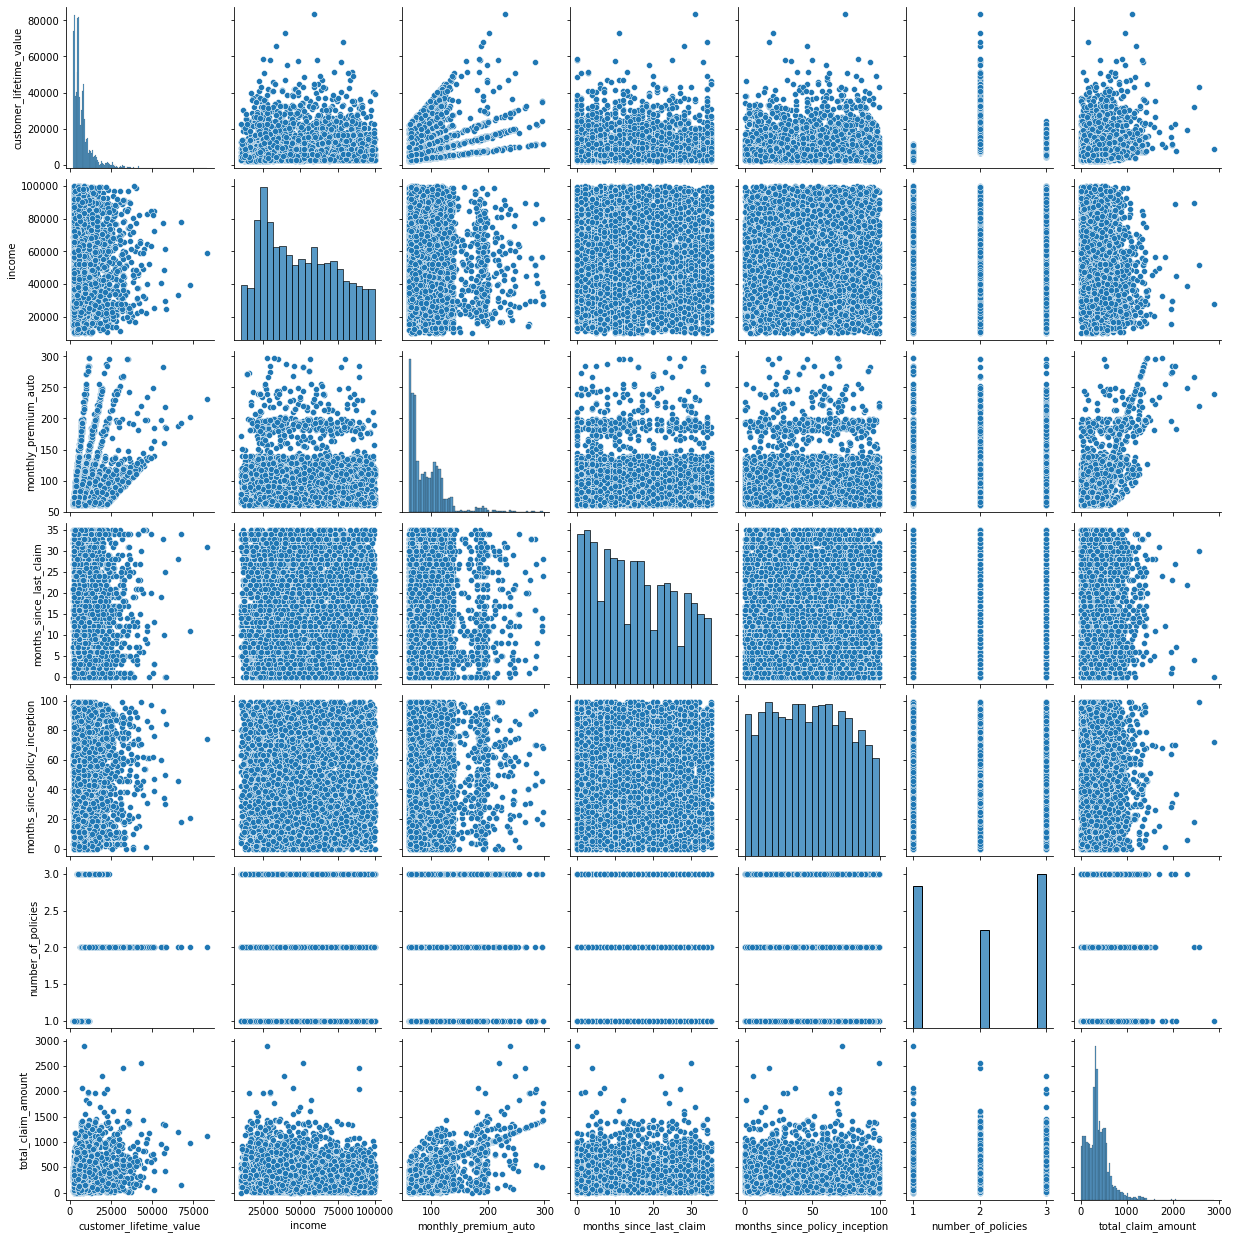

In [15]:
sns.pairplot(customers_df)
plt.show()

/home/flo/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

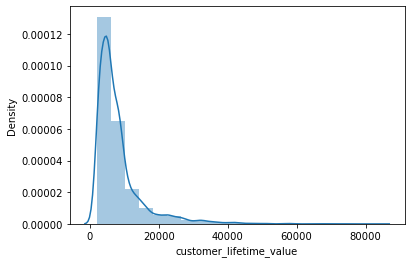

In [16]:
sns.distplot((customers_df['customer_lifetime_value']), bins=20)

In [17]:
monthly=boxcox(customers_df['customer_lifetime_value'],lmbda=-0.04)

<AxesSubplot:ylabel='Count'>

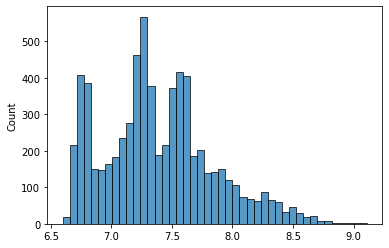

In [18]:
sns.histplot(monthly)

/home/flo/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

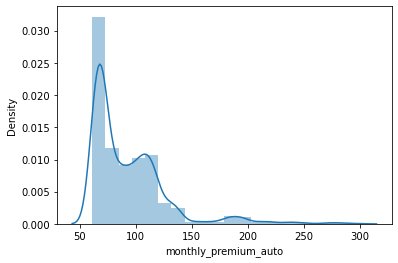

In [19]:
sns.distplot((customers_df['monthly_premium_auto']), bins=20)

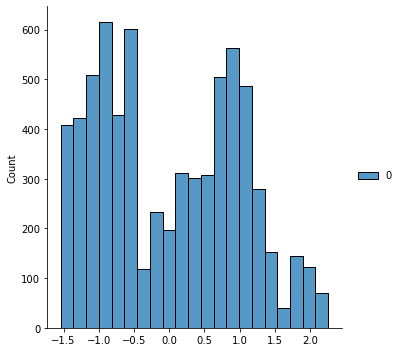

In [20]:
pt = PowerTransformer()
monthly=pt.fit_transform(customers_df['monthly_premium_auto'].to_numpy().reshape(-1,1))
sns.displot(monthly)

<AxesSubplot:ylabel='Count'>

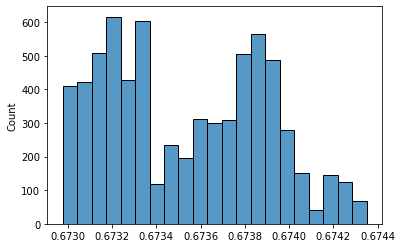

In [21]:
monthly,lam=boxcox(customers_df['monthly_premium_auto'])
sns.histplot(monthly)

<AxesSubplot:ylabel='Count'>

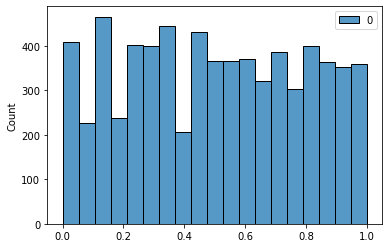

In [22]:
qt = QuantileTransformer()
monthly=qt.fit_transform(customers_df['monthly_premium_auto'].to_numpy().reshape(-1,1))
sns.histplot(monthly)

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='total_claim_amount'>

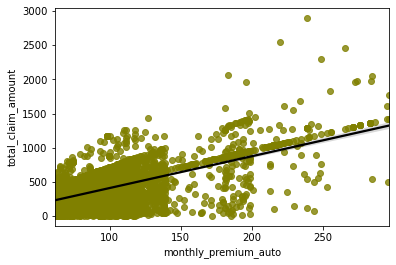

In [23]:
sns.regplot(x='monthly_premium_auto',y='total_claim_amount', data=customers_df, scatter_kws={"color": "olive"}, line_kws={"color": "black"})

#### Checking Multicorrelinilaty

X-Y split  
splitting the target variable from the dependent variables

In [27]:
X=customers_df.drop('total_claim_amount', axis=1)
y=customers_df.total_claim_amount

# we drop some useless columns
X=X.drop(columns=['effective_to_date'])

Get the numeric data.

In [28]:
numericals_features =X._get_numeric_data()
# numericals =data.select_dtypes(np.number)
numericals_features.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
0,4809.0,48029,61,7.0,52,3
2,14948.0,22139,100,34.0,31,2
3,22332.0,49078,97,10.0,3,2
6,5035.0,37405,63,8.0,99,3
7,4956.0,87197,63,35.0,45,3


In [29]:
numericals_features.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
count,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,8130.234707,50456.580461,92.963034,15.046941,47.832624,2.029925
std,6949.068193,24305.956566,34.615160,10.064762,27.895350,0.865678
min,2120.000000,10037.000000,61.000000,0.000000,0.000000,1.000000
25%,4091.000000,28432.000000,68.000000,6.000000,24.000000,1.000000
50%,5811.000000,48081.000000,83.000000,14.000000,48.000000,2.000000
75%,9076.000000,70187.000000,109.000000,23.000000,71.000000,3.000000
max,83325.000000,99981.000000,297.000000,35.000000,99.000000,3.000000


                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.002916   
income                                        0.002916  1.000000   
monthly_premium_auto                          0.399491 -0.012372   
months_since_last_claim                       0.018531 -0.034453   
months_since_policy_inception                 0.011275  0.015799   
number_of_policies                            0.202484  0.009224   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.399491                 0.018531   
income                                    -0.012372                -0.034453   
monthly_premium_auto                       1.000000                 0.005887   
months_since_last_claim                    0.005887                 1.000000   
months_since_policy_inception              0.020112                -0.039993   
number_of_policies                        -

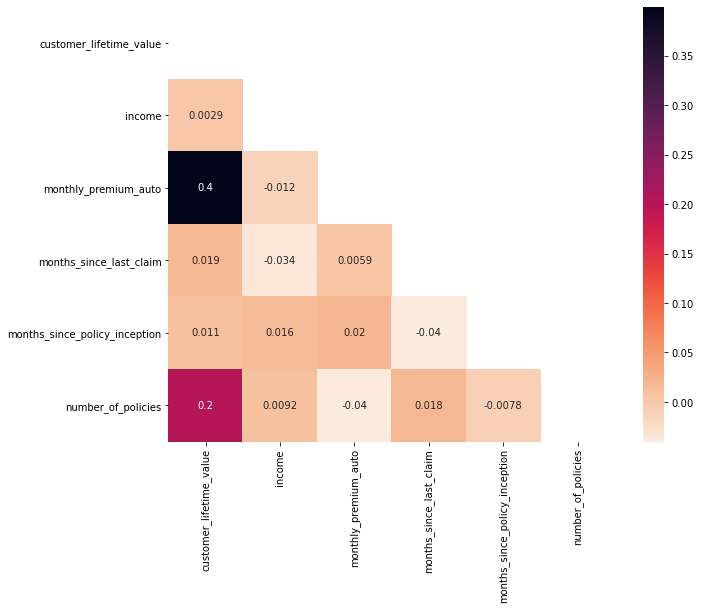

In [30]:
correlations = numericals_features.corr()
print(correlations)
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(numericals_features.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numericals_features.corr(), mask=mask, annot=True,cmap=cmap)
plt.show()

#### Standardize

In [31]:
##def normalize(X):
##    X_mean=X.mean(axis=0)
##    X_std=X.std(axis=0)
##    X_std[X_std==0]=1.0
##    X=(X-X_mean)/X_std
##    return X

##X_num=normalize(X_num)

In [32]:
X_scaled=StandardScaler().fit_transform(numericals_features)
X_scaled.shape

(6817, 6)

Get Categorical data

In [33]:
categoricals_features = X.select_dtypes(object)
categoricals_features.head()

,state,response,coverage,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,No,Basic,Employed,M,Suburban,Married,Corporate Auto,Corporate,Offer3,Agent,Four-Door Car,Medsize
2,Washington,No,Basic,Employed,M,Suburban,Single,Personal Auto,Personal,Offer3,Call Center,Four-Door Car,Medsize
3,Oregon,Yes,Extended,Employed,M,Suburban,Single,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize
6,California,No,Basic,Employed,F,Urban,Married,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize
7,California,No,Basic,Employed,M,Urban,Single,Personal Auto,Personal,Offer2,Branch,Two-Door Car,Medsize


### Categorical Variables Transformation

One Hot Encoding

In [34]:
# get dummies pandas
categoricals_features=pd.get_dummies(categoricals_features, drop_first=True)
##pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray(),
## columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)).head()

In [35]:
categoricals_features

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Personal,policy_Special,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
3,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
6,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
7,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0
10903,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0
10906,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0
10907,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0


In [36]:
all_features=pd.concat([numericals_features, categoricals_features], axis=1) # concat numerical and categorical transformations
all_features.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Personal,policy_Special,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,4809.0,48029,61,7.0,52,3,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,14948.0,22139,100,34.0,31,2,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
3,22332.0,49078,97,10.0,3,2,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
6,5035.0,37405,63,8.0,99,3,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
7,4956.0,87197,63,35.0,45,3,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0


### Train Test Split

In [37]:
X_train, X_test, y_train, y_test=train_test_split(all_features, y, test_size=.20)

In [38]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Personal,policy_Special,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
9249,7956.0,22699,74,11.0,76,2,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3787,12948.0,15083,115,25.0,14,2,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1470,2422.0,25036,61,11.0,30,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6394,4035.0,55407,101,30.0,68,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
9121,5246.0,28909,66,15.0,66,3,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6784,5358.0,40833,69,13.0,84,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
9711,5904.0,97413,73,21.0,80,3,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
10683,2960.0,69746,74,17.0,91,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3313,3963.0,88701,99,7.0,4,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0


### Apply Linear Regression

In [39]:
y_pred

NameError: name 'y_pred' is not defined

In [40]:
model=LinearRegression()    # model
model.fit(X_train.to_numpy(), y_train)   # model train
y_pred=model.predict(X_test.to_numpy())   # model prediction


y_pred_train=model.predict(X_train.to_numpy())

Text(0.5, 1.0, 'Train Residual histogram')

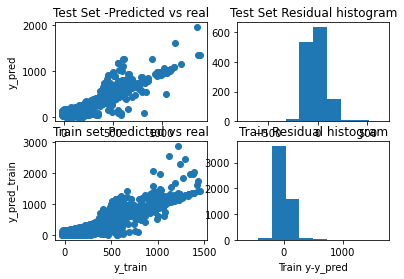

In [41]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,2)
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

#### Model Validation

MSE.

In [42]:
train_mse=mse(y_train,model.predict(X_train.to_numpy()))
test_mse=mse(y_test,model.predict(X_test.to_numpy()))

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train_mae=mae(y_train,model.predict(X_train.to_numpy()))
test_mae=mae(y_test,model.predict(X_test.to_numpy()))

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

r2= model.score(X_test.to_numpy(), y_test)
print (r2)

print(r2_score(y_test,model.predict(X_test.to_numpy())))


print ('train R2: {} -- test R2: {}'.format(model.score(X_train.to_numpy(), y_train),
                                            model.score(X_test.to_numpy(), y_test)))

train MSE: 12940.318984001837 -- test MSE: 11378.101968451876


adjusted rsquare

In [47]:
N=X_train.shape[0]
p=36
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.7862375076905103


#### Feature Importance

In [48]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [49]:
## decide on each variable importance on your model using adjusted R_squared 

In [50]:
features_importances

,Attribute,Importance
17,location_code_Suburban,379.476207
18,location_code_Urban,220.081020
31,vehicle_class_Luxury Car,56.755544
14,employmentstatus_Medical Leave,13.745372
25,renew_offer_type_Offer2,13.554392
27,renew_offer_type_Offer4,9.109811
16,gender_M,9.109609
26,renew_offer_type_Offer3,8.286815
30,sales_channel_Web,7.088926
24,policy_Special,6.340508


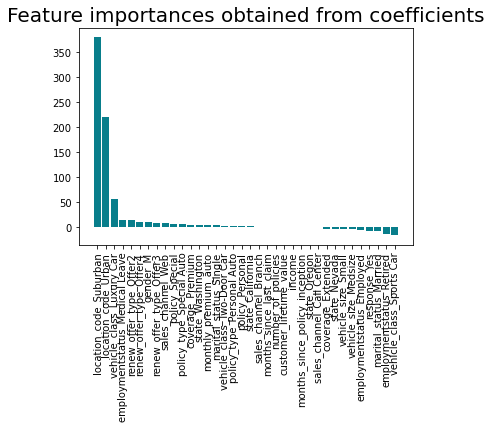

In [51]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### evaluating the importance of new variable to my study  
#### pseduo code
for each iteration
    * X_train(including new variable) = 
    * P= number of paramter 
    * new adjusted_R2= compute adjusted_r2 (p)
    * if adjusted_r_squared_with_new_feature <=  adjusted_r_squared_without_new_feature 
        drop the new variable because it is not significant to my study 

In [52]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet

In [53]:
X.head()

,state,customer_lifetime_value,response,coverage,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,4809.0,No,Basic,Employed,M,48029,Suburban,Married,61,7.0,52,3,Corporate Auto,Corporate,Offer3,Agent,Four-Door Car,Medsize
2,Washington,14948.0,No,Basic,Employed,M,22139,Suburban,Single,100,34.0,31,2,Personal Auto,Personal,Offer3,Call Center,Four-Door Car,Medsize
3,Oregon,22332.0,Yes,Extended,Employed,M,49078,Suburban,Single,97,10.0,3,2,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize
6,California,5035.0,No,Basic,Employed,F,37405,Urban,Married,63,8.0,99,3,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize
7,California,4956.0,No,Basic,Employed,M,87197,Urban,Single,63,35.0,45,3,Personal Auto,Personal,Offer2,Branch,Two-Door Car,Medsize


In [56]:
X=customers_df.drop('total_claim_amount', axis=1)
y=customers_df.total_claim_amount


In [57]:
X.head()

,state,customer_lifetime_value,response,coverage,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,4809.0,No,Basic,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,3,Corporate Auto,Corporate,Offer3,Agent,Four-Door Car,Medsize
2,Washington,14948.0,No,Basic,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,2,Personal Auto,Personal,Offer3,Call Center,Four-Door Car,Medsize
3,Oregon,22332.0,Yes,Extended,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,2,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize
6,California,5035.0,No,Basic,2011-02-14,Employed,F,37405,Urban,Married,63,8.0,99,3,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize
7,California,4956.0,No,Basic,2011-02-24,Employed,M,87197,Urban,Single,63,35.0,45,3,Personal Auto,Personal,Offer2,Branch,Two-Door Car,Medsize


In [58]:
y.head()

0    293.0
2    480.0
3    484.0
6    288.0
7    247.0
Name: total_claim_amount, dtype: float64

In [74]:
X_num = X._get_numeric_data()

In [81]:
model_dct = {"Ridge": Ridge(),
             "Lasso": Lasso(),
             "KNN": KNeighborsRegressor(),
             "Elasticnet" : ElasticNet(),
             #
            }

In [123]:
import seaborn as sns
def eval_model(X,y, model_dct):
    X_num = X._get_numeric_data()
    
    num_of_canvases = 2 * len(model_dct)
    
    fig, ax = plt.subplots(nrows=num_of_canvases, ncols=1, figsize=(12,12))
    print(ax)
    
    for (i, (name, model)) in enumerate(model_dct.items()):


        # TRAIN TEST SPLIT
        X_train, X_test, y_train, y_test = train_test_split(X_num,
                                                            y,
                                                            test_size=0.33,
                                                            random_state=42)
        
        # MODEL TRAINING
        model.fit(X_train,
                  y_train,
                 )
        
        # EVALUATION
        print("--------------------\n Model name: ", name)
        train_mse=mse(y_train, model.predict(X_train.to_numpy()))
        test_mse=mse(y_test, model.predict(X_test.to_numpy()))

        print('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

        print('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

        train_mae=mae(y_train,model.predict(X_train.to_numpy()))
        test_mae=mae(y_test,model.predict(X_test.to_numpy()))

        print('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

        r2= model.score(X_test.to_numpy(), y_test);

        print(r2_score(y_test,model.predict(X_test.to_numpy())))


        print ('train R2: {} -- test R2: {}'.format(model.score(X_train.to_numpy(), y_train),
                                                    model.score(X_test.to_numpy(), y_test)))
        
        y_pred = model.predict(X_test.to_numpy())
        
        sns.regplot(x=y_pred, y=y_test, ax=ax[2*i],color='red', scatter_kws={"s":2,})
        
        sns.histplot(x=y_pred-y_test, ax=ax[2*i+1])
        
    return ax
        

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
--------------------
 Model name:  Ridge
train MSE: 34588.01847653792 -- test MSE: 36068.76783619183
train RMSE: 185.97854305413279 -- test RMSE: 189.917792310757
train MAE: 34588.01847653792 -- test MAE: 36068.76783619183
0.419676023586663
train R2: 0.4648692903389603 -- test R2: 0.419676023586663
--------------------
 Model name:  Lasso
train MSE: 34589.435875996314 -- test MSE: 36063.57106803579
train RMSE: 185.98235366828843 -- test RMSE: 189.9041101925806
train MAE: 34589.435875996314 -- test MAE: 36063.57106803579
0.41975963634478397
train R2: 0.4648473609538307 -- test R2: 0.41975963634478397
--------------------
 Model name:  KNN
train MSE: 37190.65022115174 -- test MSE: 59246.423520000004
train RMSE: 192.84877552411822 -- test RMSE: 243.40588226252873
train MAE: 37190.65022115174 -- test MAE: 59246.423520000004
0.046762000810694815
train R2: 0.424602509128

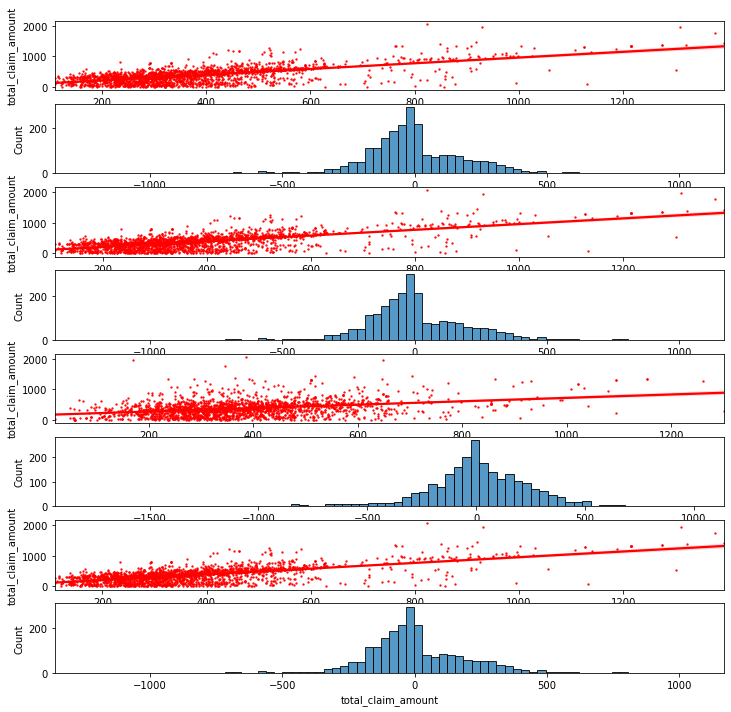

In [124]:
ax = eval_model(X,y,model_dct)

In [125]:
ax

array([<AxesSubplot:ylabel='total_claim_amount'>,
       <AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>,
       <AxesSubplot:ylabel='total_claim_amount'>,
       <AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>,
       <AxesSubplot:ylabel='total_claim_amount'>,
       <AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>,
       <AxesSubplot:ylabel='total_claim_amount'>,
       <AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>],
      dtype=object)